In [2]:
%pylab qt
%matplotlib inline

import pandas
import fitting
import scipy.constants as cst
import random as rd
from scipy.integrate import quad
from scipy.fftpack import fft
import matplotlib.mlab as mlab
from scipy.integrate import odeint
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

def next_step(x, r):
    return r*x*(1-x)

def period_integral(theta, l=1, g=cst.g):
    def func(phi):
        k = np.sin(theta/2)
        return 1/np.sqrt(1-k**2*(np.sin(phi))**2)
    integral = quad(func, 0, np.pi/2)
    T0 = 2*np.pi*np.sqrt(l/g)
    return 2*T0/np.pi*integral[0]

def make_fft(x,y):
    N = len(x)
    T = x[1]-x[0]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    return xf, 2.0/N * np.abs(yf[0:N//2])

def solve_pendulum(t, f0=1, gamma=8e-1, theta0=-4*np.pi, angular_speed0=25/2/np.pi):
    a  = -(2*np.pi*f0)**2    # g/l dans le cas du pendule
    f  = - gamma             # frottements
    def equation(Y,temps):                  # L'équation différentielle sous forme de fonction
        (y,dy)=Y                            # On décompose notre Y en (y,dy)
        return [dy,a*sin(y)+f*dy]           # On renvoie ce que vaut Y'
    CI = [theta0, angular_speed0*2*np.pi]    # conditions initiales
    Y, dY = odeint(equation, CI, t).T # Pour que odeint renvoit séparément les valeurs de Y et de Y',
                                      # il faut rajouter .T à la fin
    return Y, dY

def potentiel(theta):
    return 1-np.cos(theta)

def make_phase_space(alpha=1, axe=None, equal=True):
    a  = -1     # g/l dans le cas du pendule
    f  = 0      # frottements
    
    if axe is None:
        plt.figure(figsize=(10,6))
        sps = (1,1)
        ax = plt.subplot2grid(sps, (0,0))
    else:
        ax = axe
    
    def equation(Y,temps):                  # L'équation différentielle sous forme de fonction
        (y,dy)=Y                            # On décompose notre Y en (y,dy)
        return [dy,a*sin(y)+f*dy]           # On renvoie ce que vaut Y'

    def solver(CI, periods=10):
        t = np.linspace(0, 2*np.pi*periods,10000)
        Y, dY = odeint(equation, CI, t).T
        return Y, dY, t

    def plot_ci(ci, ax, periods=10):
        Y, dY, t = solver(ci, periods=periods)
        ax.plot(Y, dY, "k", alpha=alpha)

    for theta0 in np.array([-2,-1,0,1,2])*2*np.pi:
        for theta1 in np.linspace(0,np.pi, 6):
            CI = [theta0+theta1, 0]
            Y,_, t = solver(CI, periods=5)
            for time, y in zip(t, Y):
                eps = np.abs(y-CI[0])
                if time < 2*np.pi:
                    threshold = eps
                    pass
                elif eps < threshold:
                    threshold = eps
                    pass
                else:
                    break
            period = time/(2*np.pi)
            plot_ci(CI, ax, periods=period)

    plot_ci([-4*np.pi, 2.00001], ax)
    plot_ci([4*np.pi, -2.00001], ax)

    for theta0 in [-4*np.pi, 4*np.pi]:
        for dtheta in [0.1,0.5, 0.9, 1.3, 1.7,2.1]:
            CI = [theta0, -np.sign(theta0)*(2+dtheta)]
            plot_ci(CI, ax, periods=4)
  
    ax.set_xlabel("$\\theta$")
    ax.set_ylabel("$\dot{\\theta}/\omega_0$")
    ax.set_xticks(np.arange(-10,11,1)*np.pi)
    ticklabels = ["%.0f$\pi$"%(i) for i in np.arange(-10,11,1)]
    ticklabels[int((len(ticklabels))/2)] = "0"
    ticklabels[int((len(ticklabels))/2)-1] = "$-\pi$"
    ticklabels[int((len(ticklabels))/2)+1] = "$\pi$"
    ax.set_xticklabels(ticklabels)
    ax.set_yticks(np.arange(-10,11,1)*np.pi)
    ax.set_yticklabels(ticklabels)
    ax.set_xlim(-4*np.pi, 4*np.pi)
    ax.set_ylim(-4, 4)
    if equal:
        ax.set_aspect("equal")
    plt.tight_layout()
    
def mysavefig(name):
    plt.tight_layout()
    plt.savefig(name, bbox_inches="tight", dpi=200)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['fft']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Caractère sinusoïdal ou non

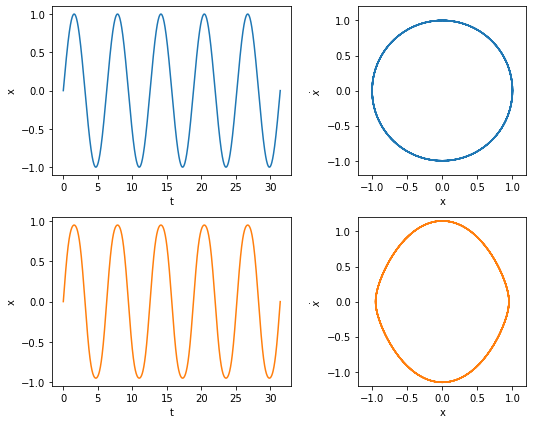

In [2]:
t = np.linspace(0, 5*2*np.pi, 1001)

x1 = np.sin(t)
v1 = -np.cos(t)

x2 = np.sin(t) + 0.05*np.sin(3*t)
v2 = -np.cos(t) - 0.15*np.cos(3*t)

plt.figure(figsize=(8,6))
sps = (2,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))
ax3 = plt.subplot2grid(sps, (1,0))
ax4 = plt.subplot2grid(sps, (1,1))

ax1.plot(t,x1)
ax2.set_aspect("equal")
ax2.plot(x1, v1)

ax3.plot(t,x2, 'C1')
ax4.set_aspect("equal")
ax4.plot(x2, v2, 'C1')

for ax in [ax1, ax3]:
    ax.set_xlabel("t")
    ax.set_ylabel("x")

for ax in [ax2, ax4]:
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_xlabel("x")
    ax.set_ylabel("$\dot{x}$")

mysavefig("circular_or_not.png")

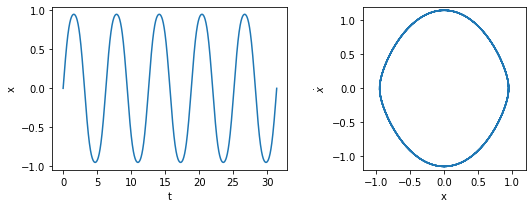

In [283]:
t = np.linspace(0, 5*2*np.pi, 1001)

x2 = np.sin(t) + 0.05*np.sin(3*t)
v2 = -np.cos(t) - 0.15*np.cos(3*t)

plt.figure(figsize=(8,3))
sps = (1,2)
ax3 = plt.subplot2grid(sps, (0,0))
ax4 = plt.subplot2grid(sps, (0,1))

ax3.plot(t,x2)
ax4.set_aspect("equal")
ax4.plot(x2,v2)
ax3.set_xlabel("t")
ax3.set_ylabel("x")
ax4.set_xlim(-1.2, 1.2)
ax4.set_ylim(-1.2, 1.2)
ax4.set_xlabel("x")
ax4.set_ylabel("$\dot{x}$")

mysavefig("circular_or_not.png")

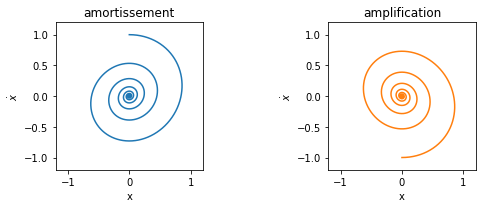

In [75]:
t = np.linspace(0, 10*2*np.pi, 10001)

x2 = np.exp(-t/10)*np.sin(t)
v2 = np.exp(-t/10)*(np.cos(t)+1/10*np.sin(t))

plt.figure(figsize=(8,3))
sps = (1,2)
ax3 = plt.subplot2grid(sps, (0,0))
ax4 = plt.subplot2grid(sps, (0,1))

ax3.plot(x2,v2)
ax4.plot(x2,-v2, 'C1')
ax3 .set_title("amortissement")
ax4 .set_title("amplification")
for ax in [ax3, ax4]:
    ax.set_aspect("equal")
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_xlabel("x")
    ax.set_ylabel("$\dot{x}$")
    
mysavefig("irreversibilite.png")

# Portrait de phase du pendule simple

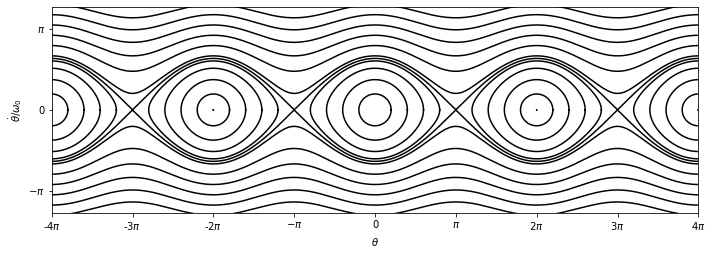

In [3]:
make_phase_space(alpha=1)

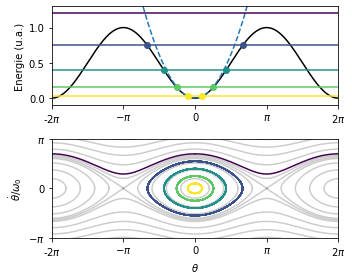

In [4]:
plt.figure(figsize=(5,4))
sps = (2,1)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0), sharex=ax1)

theta = np.linspace(-2*np.pi, 2*np.pi, 1001)
ax1.plot(theta, potentiel(theta)/2, "k")
ax1.plot(theta, theta**2/4, "--")

make_phase_space(alpha=0.2, axe=ax2, equal=False)
ax2.set_xlim(-2*np.pi, 2*np.pi)
ax2.set_ylim(-np.pi, np.pi)

t = np.linspace(0, 10,10000)
f0     = 1
omega0 = 2*np.pi*f0
thetas0 = np.linspace(0.1, 0.7, 5)*np.pi

colormap = plt.cm.viridis
colorst = [colormap(i) for i in np.linspace(0, 1, len(thetas0))][::-1]
for i, speed in enumerate(thetas0):
    Y, dY  = solve_pendulum(t, f0=f0, gamma = 0, theta0=0, angular_speed0=speed)
    if np.abs(Y.max()) < np.pi:
        thetas = np.array([Y.min(), Y.max()])
        ax1.plot(thetas, potentiel(thetas)/2, "o", color=colorst[i])
    energy = potentiel(Y)+1/2*(dY/omega0)**2
    ax1.plot(theta, np.ones(len(theta))*energy[0]/2, color=colorst[i])
    ax2.plot(Y, dY/omega0, color=colorst[i])
    ax2.plot(-Y, dY/omega0, color=colorst[i])
ax1.set_ylim(-0.1, 1.3)
#ax1.set_xticklabels([])
ax1.set_ylabel("Energie (u.a.)")
plt.tight_layout()

mysavefig("pendulum_energy.png")

# Non linéarité

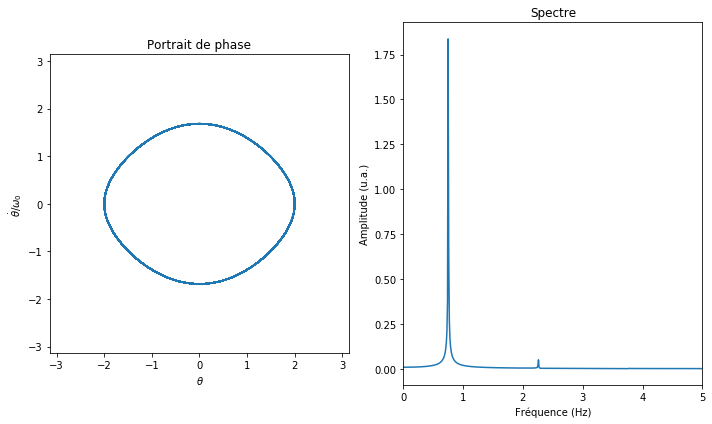

In [5]:
t = np.linspace(0, 100,10000)
f0     = 1
omega0 = 2*np.pi*f0
theta0 = 2

plt.figure(figsize=(10,6))
sps = (1,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))

Y, dY = solve_pendulum(t, f0=f0, gamma = 0, theta0=theta0, angular_speed0=0)
data = pandas.Series(Y, index=t)
freq, y_fft = make_fft(t, Y)

ax1.plot(Y, dY/omega0)
ax1.set_aspect("equal")
ax1.set_xlabel("$\\theta$")
ax1.set_ylabel("$\dot{\\theta}/\omega_0$")
ax1.set_title("Portrait de phase")
ax2.plot(freq, y_fft)
ax2.set_xlim(0,5)
ax2.set_xlabel("Fréquence (Hz)")
ax2.set_ylabel("Amplitude (u.a.)")
ax2.set_title("Spectre")
ax1.set_xlim(-np.pi, np.pi)
ax1.set_ylim(-np.pi, np.pi)

plt.tight_layout()

# Simulations : pendule simple amorti

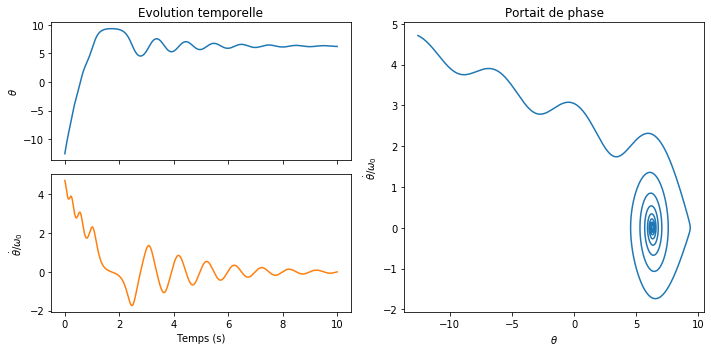

In [6]:
t = np.linspace(0, 10,10000)
f0     = 1
omega0 = 2*np.pi*f0

Y, dY = solve_pendulum(t, f0=f0, gamma = 9e-1, theta0=-4*np.pi, angular_speed0=1.5*np.pi)

plt.figure(figsize=(10,5))
sps = (2,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax1.plot(t, Y)
ax1.set_ylabel("$\\theta$")
ax1.set_title("Evolution temporelle")
ax1.set_xticklabels([])
ax1 = plt.subplot2grid(sps, (1,0))
ax1.plot(t, dY/omega0, "C1")
ax1.set_xlabel("Temps (s)")
ax1.set_ylabel("$\dot{\\theta}/\omega_0$")
ax2 = plt.subplot2grid(sps, (0,1), rowspan=2)
ax2.plot(Y, dY/omega0)
ax2.set_title("Portait de phase")
ax2.set_xlabel("$\\theta$")
ax2.set_ylabel("$\dot{\\theta}/\omega_0$")
#ax2.set_aspect("equal")
plt.tight_layout()

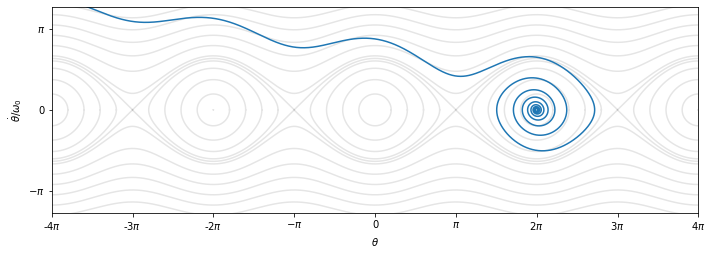

In [7]:
##### Paramètres de l'oscillateur :
amortissement    = 0.9
frequence_propre = 1
omega0           = 2*np.pi*frequence_propre 

##### Co nditions initiales
theta0      = -4 * np.pi
thetapoint0 = +1.4 * np.pi

Y, dY = solve_pendulum(t, f0=frequence_propre, gamma = amortissement, theta0=theta0, angular_speed0=thetapoint0)
make_phase_space(alpha=0.1)
plt.plot(Y, dY/omega0)

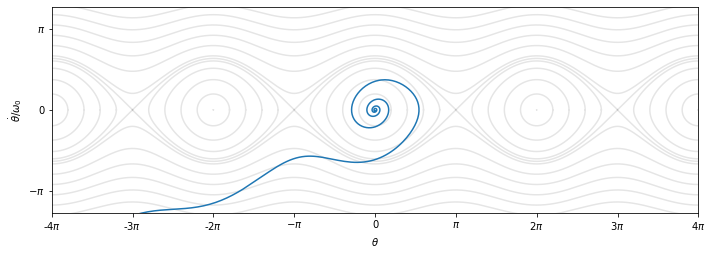

In [8]:
##### Paramètres de l'oscillateur :
amortissement    = -2
frequence_propre = 1
omega0           = 2*np.pi*frequence_propre 

##### Co nditions initiales
theta0      = -0* np.pi
thetapoint0 = 0.01 * np.pi

make_phase_space(alpha=0.1)
t = np.linspace(0, 100,10000)
Y, dY = solve_pendulum(t, f0=frequence_propre, gamma = amortissement, theta0=theta0, angular_speed0=-thetapoint0)
plt.plot(Y, dY/omega0)

# Van der Pol

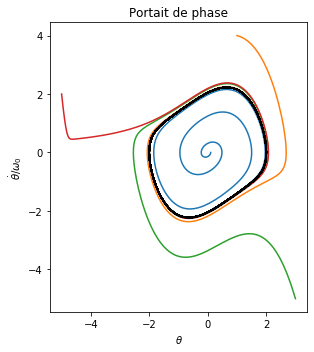

In [9]:
def solve_vanderpol(t, f0=1, epsilon=8e-1, theta0=-4*np.pi, angular_speed0=25/2/np.pi):
    a  = -(2*np.pi*f0)**2    # g/l dans le cas du pendule
    CI = [theta0, angular_speed0*2*np.pi]    # conditions initiales
    def vanderpol(etat_courant,time):# L'équation différentielle sous forme de fonction
        (y,dy) = etat_courant              # On décompose notre Y en (y,dy)
        return [dy,a*y-epsilon*np.sqrt(-a)*(y**2-1)*dy]             # On renvoie ce que vaut Y'
    Y, dY = odeint(vanderpol, CI, t).T # Pour que odeint renvoit séparément les valeurs de Y et de Y',
    return Y, dY

t = np.linspace(0,50,10000)
f0     = 1
omega0 = 2*np.pi*f0

plt.figure(figsize=(10,5))
sps = (1,1)
ax1 = plt.subplot2grid(sps, (0,0))

epsilon=0.5
for theta0, speed0 in zip([0.1, 1,3, -5], [0, 4, -5, 2]):
    Y, dY = solve_vanderpol(t, f0=f0, epsilon = epsilon, theta0=theta0, angular_speed0=speed0)
    ax1.plot(Y, dY/omega0)
Y, dY = solve_vanderpol(t, f0=f0, epsilon = epsilon, theta0=2, angular_speed0=0)
ax1.plot(Y, dY/omega0, "k")
ax1.set_title("Portait de phase")
ax1.set_xlabel("$\\theta$")
ax1.set_ylabel("$\dot{\\theta}/\omega_0$")
ax1.set_aspect("equal")
plt.tight_layout()

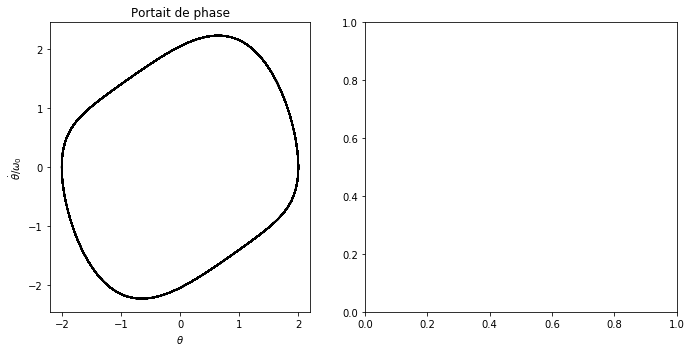

In [10]:
Y, dY = solve_vanderpol(t, f0=f0, epsilon = 0.5, theta0=2, angular_speed0=0)

plt.figure(figsize=(10,5))
sps = (1,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))


ax1.plot(Y, dY/omega0, "k")
ax1.set_title("Portait de phase")
ax1.set_xlabel("$\\theta$")
ax1.set_ylabel("$\dot{\\theta}/\omega_0$")
ax1.set_aspect("equal")
plt.tight_layout()

In [40]:
f = 1

def solve_vanderpol_forced(t, f0=1, epsilon=8e-1, theta0=-4*np.pi, angular_speed0=25/2/np.pi):
    a  = -(2*np.pi*f0)**2    # g/l dans le cas du pendule
    CI = [theta0, angular_speed0*2*np.pi]    # conditions initiales
    def vanderpol_forced(etat_courant,time):# L'équation différentielle sous forme de fonction
        (y,dy) = etat_courant              # On décompose notre Y en (y,dy)
        return [dy,a*y-epsilon*np.sqrt(-a)*(y**2-1)*dy+200*np.sin(2*np.pi*f*time)]             # On renvoie ce que vaut Y'
    Y, dY = odeint(vanderpol_forced, CI, t).T # Pour que odeint renvoit séparément les valeurs de Y et de Y',
    return Y, dY

t = np.linspace(0,100,10000)
f0     = 1
omega0 = 2*np.pi*f0

fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')

Y, dY = solve_vanderpol_forced(t, f0=f0, epsilon = 1, theta0=1.1, angular_speed0=0)
x, y, z = Y, dY, 3*np.sin(2*np.pi*f*t)
ax.plot(x, y, z)

# Système à double puit

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


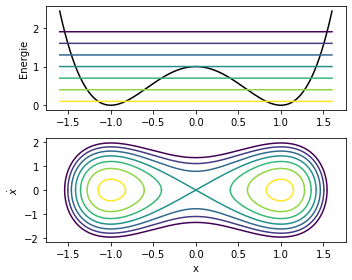

In [236]:
plt.figure(figsize=(5,4))
sps = (2,1)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0), sharex=ax1)

def potentiel_double(x):
    return x**4-2*x**2+1

span = 1.6
x = np.linspace(-span, span, 100001)
ax1.plot(x, potentiel_double(x), "k")

e0s = [0.1,0.4,0.7,1.,1.3, 1.6, 1.9]

colormap = plt.cm.viridis
colorst = [colormap(i) for i in np.linspace(0, 1, len(e0s))][::-1]
for i, e0 in enumerate(e0s):
    v = np.sqrt(2*(e0-potentiel_double(x)))
    ax1.plot(x, np.ones(len(x))*e0, color=colorst[i])
    ax2.plot(x, v, color=colorst[i])
    ax2.plot(x, -v, color=colorst[i])
#ax1.set_ylim(-0.1, 5)
#ax1.set_xticklabels([])
ax1.set_ylabel("Energie")
ax2.set_xlabel("x")
ax2.set_ylabel("$\dot{x}$")
plt.tight_layout()

mysavefig("double_pendulum_energy.png")

# Pendule simple forcé

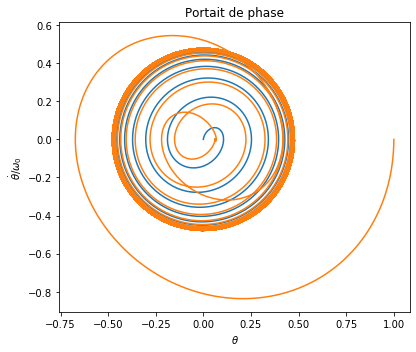

In [11]:
def solve_pendulum_forced(t, f0=1, epsilon=8e-1, theta0=-4*np.pi, angular_speed0=25/2/np.pi):
    a  = -(2*np.pi*f0)**2    # g/l dans le cas du pendule
    CI = [theta0, angular_speed0*2*np.pi]    # conditions initiales
    def pendulum_forced(etat_courant,time):# L'équation différentielle sous forme de fonction
        (y,dy) = etat_courant              # On décompose notre Y en (y,dy)
        return [dy,a*y-epsilon*dy + 3*np.sin(2*np.pi*f0*time)]             # On renvoie ce que vaut Y'
    Y, dY = odeint(pendulum_forced, CI, t).T # Pour que odeint renvoit séparément les valeurs de Y et de Y',
    return Y, dY

t = np.linspace(0,50,10000)
f0     = 1
omega0 = 2*np.pi*f0

plt.figure(figsize=(10,5))
sps = (1,1)
ax1 = plt.subplot2grid(sps, (0,0))

for theta0, speed0 in zip([0,1], [0,0]):
    Y, dY = solve_pendulum_forced(t, f0=f0, epsilon = 1, theta0=theta0, angular_speed0=speed0)
    ax1.plot(Y, dY/omega0)
ax1.set_title("Portait de phase")
ax1.set_xlabel("$\\theta$")
ax1.set_ylabel("$\dot{\\theta}/\omega_0$")
ax1.set_aspect("equal")
plt.tight_layout()

# Pendule simple

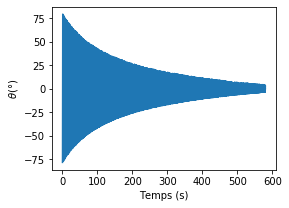

In [2]:
##### Load data and plot

# Data from TP 
folder = "tp_non_linearite/"
file   = "pendule_10ab.txt"

raw  = np.loadtxt(folder+file, skiprows=1)
x = raw[:,0]
y = raw[:,1]
uy = np.ones(len(y))*0.4
data = pandas.Series(y, index=np.array(x)-20)
data = data[0:]

plt.figure(figsize=(4,3))
plt.xlabel("Temps (s)")
plt.ylabel("$\\theta (\degree)$")
plt.plot(data.index, data.values)

##### Fit results #####
RAW
        optimised params : [   0.70367556  -41.482308   -127.28364559    0.26735964]
        uncertainties    : [0.00048604 0.07134229 0.30863545 0.05137735]
        chi2r            : 0.9057557171641705
READABLE
        freq       = (7.037 +/- 0.005) * 1e-1
        scale      = (-4.148 +/- 0.007) * 1e1
        phi        = (-1.273 +/- 0.003) * 1e2
        offset     = (2.7 +/- 0.5) * 1e-1
#######################


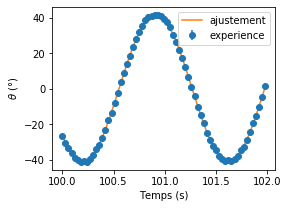

In [3]:
# Test the fitting method on a portion of the curve

period   = 2
portion  = data[100:100+period]
uportion = pandas.Series(uy, index=x)[100:100+period]

fitter = fitting.Fit("sin", x=portion.index, y=portion.values, uy = uportion.values)
fit_params, ufit_params = fitter.fit(manualguess_params=None, verbosemode=True)

xx = portion.index.values
yy = fitter.func(xx, fit_params[0],fit_params[1], fit_params[2], fit_params[3])

plt.figure(figsize=(4,3))
plt.xlabel("Temps (s)")
plt.ylabel("$\\theta\ (\degree)$")
plt.errorbar(portion.index, portion.values, yerr=uportion.values, fmt="o", label="experience")
plt.plot(xx,yy, label="ajustement")
plt.legend()

Text(0, 0.5, 'Période (s)')

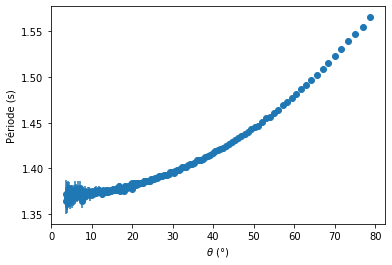

In [66]:
##### Extract period and amplitude from data

step = 3
stop = data.index.max()
start = 0
end = start + step

period, uperiod, amplitude, offset = [], [], [], []
while end < stop:
    portion = data[start:end]
    start = end
    end  += step
    fitter = fitting.Fit("sin", x=portion.index, y=portion.values)
    if len(period) > 0:
        manualguess_params = fit_params
        manualguess_params[2] = 0
    fit_params, ufit_params = fitter.fit(manualguess_params=None, verbosemode=False)
    period.append(1/fit_params[0])
    uperiod.append(period[-1]**2*ufit_params[0])
    amplitude.append(np.abs(fit_params[1]))
    offset.append(fit_params[3])
amplitude = np.array(amplitude)
amplitude = amplitude + mean(offset)
period    = np.array(period)
uperiod   = np.array(uperiod)
offset    = np.array(offset)

plt.errorbar(amplitude, period, yerr=uperiod, fmt="o", label="data")
plt.xlabel("$\\theta\ (\degree)$")
plt.ylabel("Période (s)")

##### Fit results #####
RAW
        optimised params : [1.36964543 0.06926104 0.00370166]
        uncertainties    : [0.00034476 0.000703   0.00037175]
        chi2r            : 0.19909505297422375
READABLE
        T0         = (1.3696 +/- 0.0003) * 1e0
        a          = (6.93 +/- 0.07) * 1e-2
        b          = (3.7 +/- 0.4) * 1e-3
#######################


Text(0, 0.5, 'Période (s)')

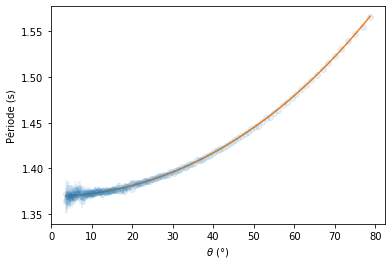

In [70]:
##### Use Borda formula for "small" amplitudes

fitter = fitting.Fit("pendulum", x=amplitude*np.pi/180, y=period, uy=uperiod)
manualguess_params = [1, 1/16, 11/3072]
fit_params, ufit_params = fitter.fit(manualguess_params=manualguess_params, verbosemode=True)
y = fitter.func(amplitude*np.pi/180, *fit_params)

plt.errorbar(amplitude, period, yerr=uperiod, fmt="o", label="data", alpha=0.1)
plt.plot(amplitude, y, label="ajustement")
plt.xlabel("$\\theta\ (\degree)$")
plt.ylabel("Période (s)")

In [35]:
print(1/16, 11/3072)

0.0625 0.0035807291666666665


Text(0, 0.5, 'Période (s)')

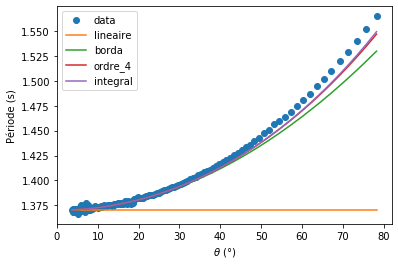

In [56]:
length = fit_params[0]**2 * cst.g / (4*np.pi**2)

period_integ = []
for amp in amplitude:
    period_integ.append(period_integral(amp*np.pi/180, l=length))

period_linarized = 2*np.pi*np.sqrt(length/cst.g)
period_borda     = period_linarized*(1+(amplitude*np.pi/180)**2/16)
period_4         = period_linarized*(1+(amplitude*np.pi/180)**2/16+11*(amplitude*np.pi/180)**4/3072)

#plt.figure(figsize=(4,3))
#plt.errorbar(amplitude, period, yerr=uperiod, fmt="o", label="data")
plt.plot(amplitude, period, "o", label="data")
plt.plot(amplitude, period_linarized*np.ones(len(amplitude)), label="lineaire")
plt.plot(amplitude, period_borda, label="borda")
plt.plot(amplitude, period_4, label="ordre_4")
plt.plot(amplitude, period_integ, label="integral")

plt.legend(loc="best")
plt.xlabel("$\\theta\ (\degree)$")
plt.ylabel("Période (s)")

# Non linéarité

Text(0, 0.5, 'Amplitude (u.a.)')

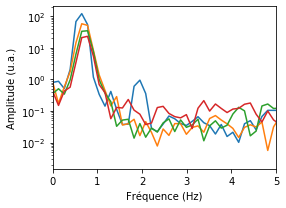

In [19]:
fs   = 1 / (data.index[1]-data.index[0])
NFFT = 1*fs

plt.figure(figsize=(4,3))

for start in np.array([0,1,2,3])*100:
    d = data[start:start+10]
    Pxx, freqs = mlab.psd(d.values, Fs = fs)
    plt.semilogy(freqs, np.sqrt(Pxx))
    plt.xlim(0,5)
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude (u.a.)")

# Vers le chaos

(0, 1)

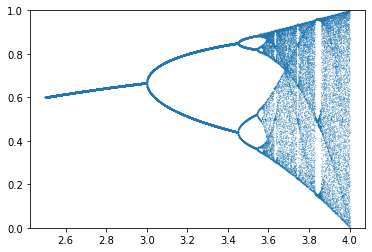

In [63]:
##### CHAOS

rs = np.linspace(2.5,4, 10000)
rend = []
xend = []
N = 1000
n = range(N)
x = np.zeros(N)
for r in rs:
    if r < 3.5:
        attempts = 10
    else:
        attemps = 50000
    for j in range(attempts):
        x[0] = rd.random()

        for i in n[1:]:
            x[i] = next_step(x[i-1], r)
        xend.append(x[-1])
        rend.append(r)
    
plt.plot(rend, xend, ".", markersize=0.2)
plt.ylim(0,1)